# Author: Michael Elgin (melgin@uwyo.edu)
# 2023_11_13

# Notebook for Exploratory Data Analysis

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [4]:
#Load the data for the EDA
df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")

#Add another target column to remember color
df_red["color"] = 0
df_white["color"] = 1
df_all = pd.concat([df_white, df_red], ignore_index=True)

In [13]:
#See the first values of the data
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [31]:
#See data's descriptive statistics
df_all.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [32]:
#See class distribution for classification
df_all['color'].value_counts()/len(df_all) * 100 #Displays as a percent

1    75.388641
0    24.611359
Name: color, dtype: float64

# As can be seen from the head, the dataset contains 11 features, all of which are continuous values.

# Next the dataset will be examined to see if it contains any missing values.

In [29]:
df_all.isna().any() #Shows if there are any missing values at the level of granularity of the features

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool

In [30]:
#Display amount of samples (N)
len(df_all)

6497

# Feature correlations - this is useful in determining which features to prune, especially since partial dependency plots may not be trustworthy if there are correlated features.

In [37]:
#Pearson's correlation coefficient (for continuous data)
correlation = df_all.corr()
print(correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
color                     -0.486740         -0.653036     0.187397   

                   

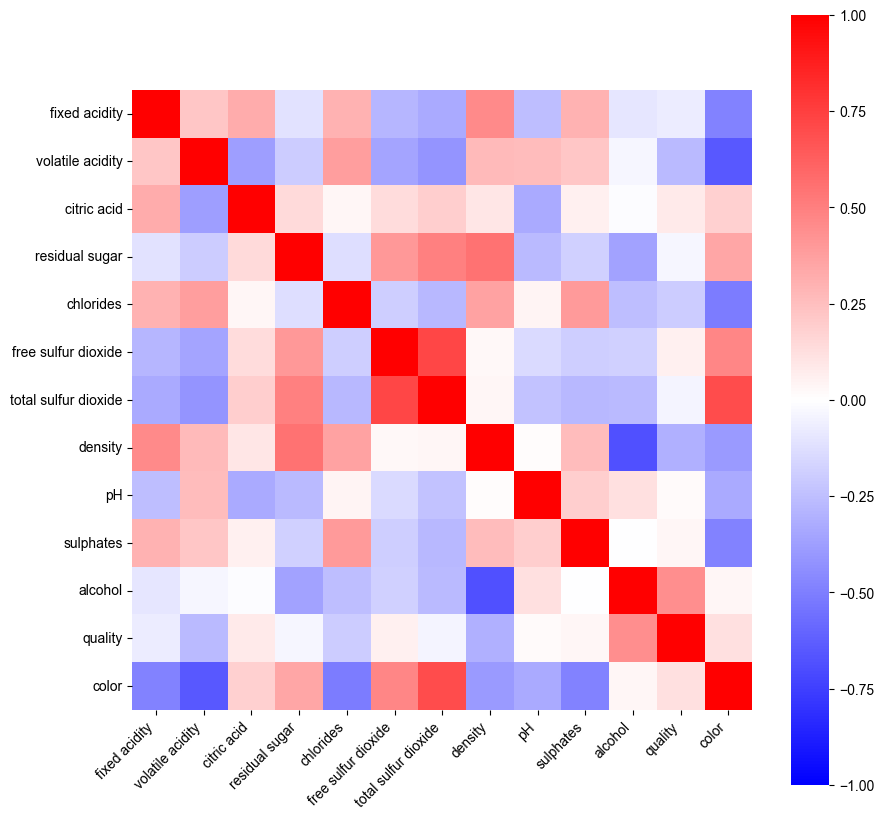

In [38]:
file_path = "graphs/"

#Display the correlation matrix as a heatmap
plt.rcParams["font.family"] = "Arial"
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0, #correlations span from -1 to 1
    cmap="bwr", #blue-white-red
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
)

plt.savefig(file_path + "correlations")

# Plot density functions for each feature to see which have good separation between colors

C:\Users\micha\AppData\Local\Temp\ipykernel_21368\3183365110.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all[df_all['color'] == target][feature_name],
C:\Users\micha\AppData\Local\Temp\ipykernel_21368\3183365110.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all[df_all['color'

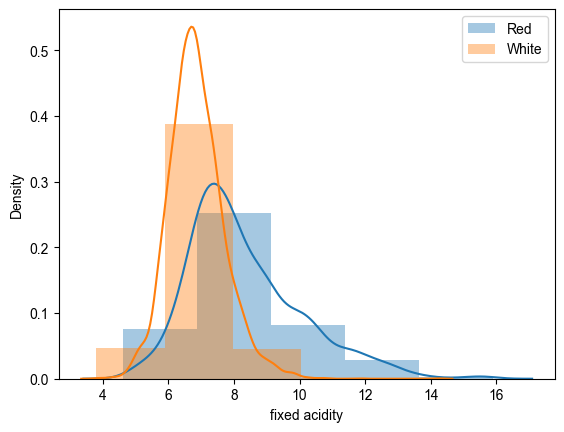

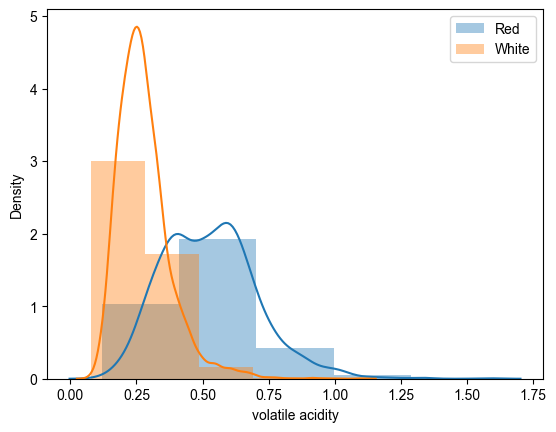

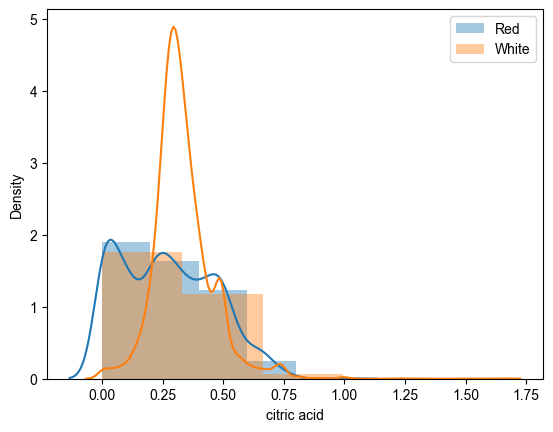

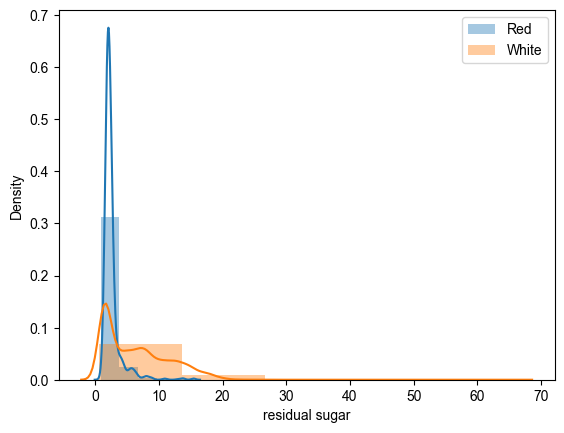

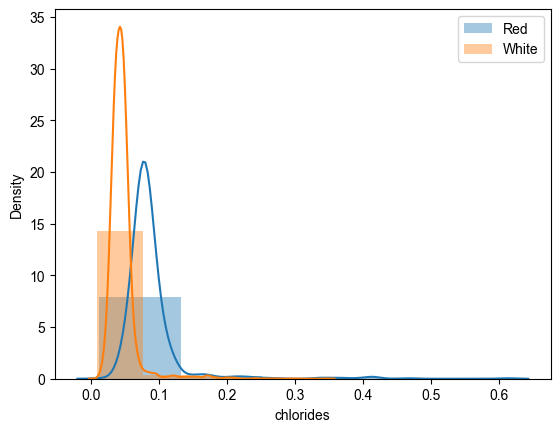

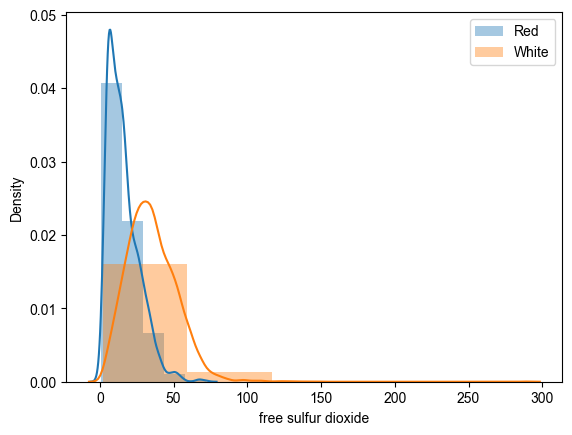

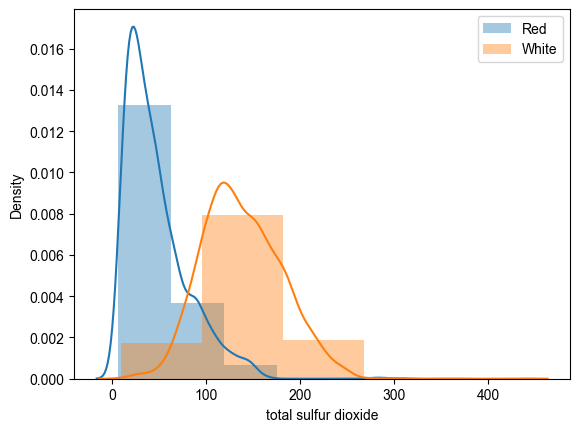

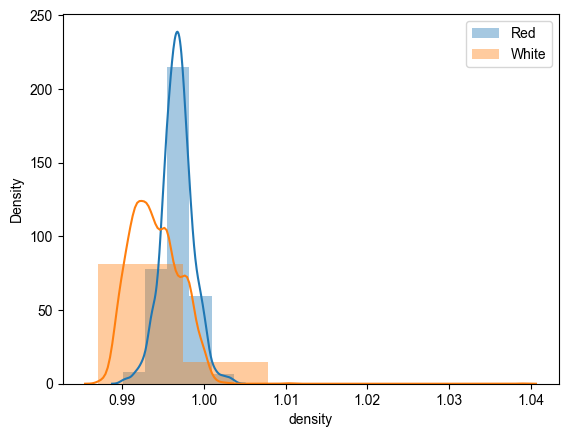

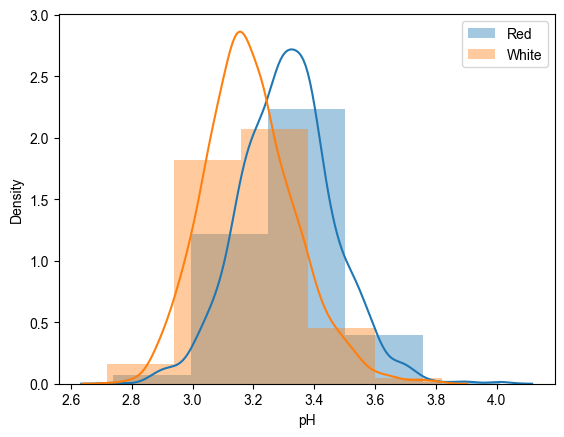

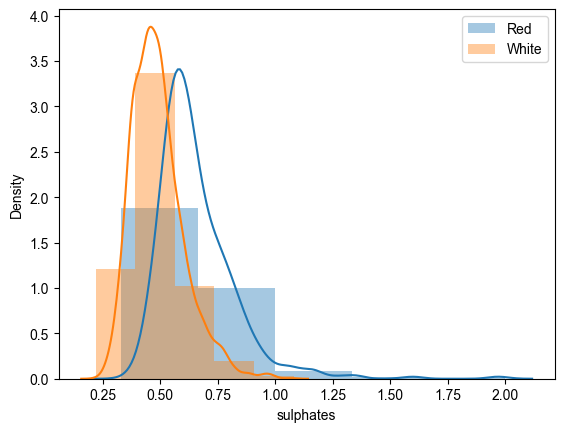

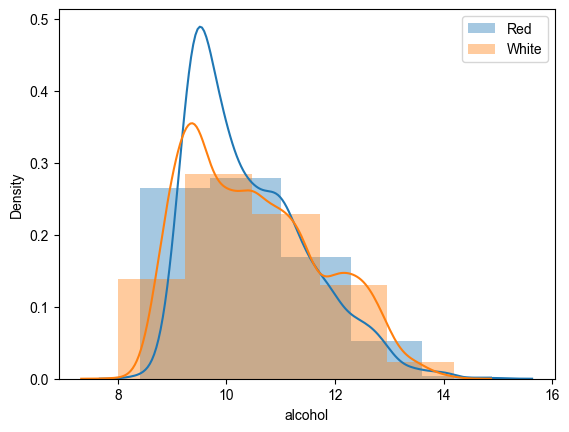

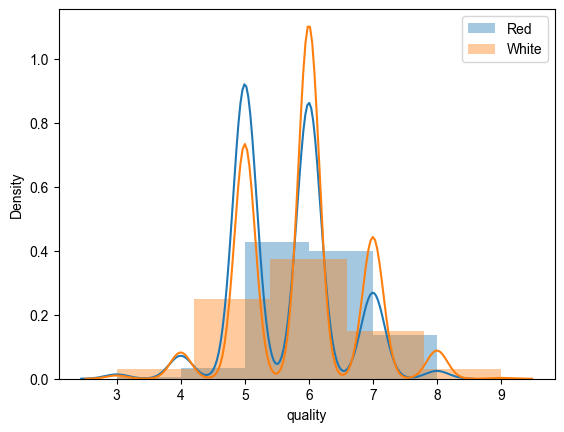

In [36]:
#Plot the density distribution of the features with the colors
feature_names = df_all.columns.drop("color")

for feature_name in feature_names:
    f,ax = plt.subplots()
    for target in [0,1]:
        sns.distplot(df_all[df_all['color'] == target][feature_name],
                     bins = 5,
                     ax = ax,
                     label = "White" if target == 1 else "Red")
    ax.legend()
    plt.savefig(file_path + "class_dist_" + feature_name.replace(" ", "_"))